# Homwork 2
**Name:**  [edit cell and put your name here]


In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Instructions
* You _may_ submit very neatly organized _**handwritten**_ math, or you may do the math in the cells of this notebook using $\LaTeX$. With $\LaTeX$, you may follow the example in this cell, or you can put `%%latex` at the top of any cell.  
* In the last problem set most submissions were clear and reasonablypresented, but I have my preferences for what I like to see from students. In particular, I am a big fan of the 3-column `align` environment, with the last column used as an explanation. In particular, this:
 $$ E(\mathbf{w}) 
   = \sum_{n=1}^N \{y(x_n |\mathbf{w}) - t_n\}^2
   = \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}^2 \\
   \frac{\partial}{\partial w_i} E(\mathbf{w}) 
   = \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}x_n^i 
   = \sum_{n=1}^N \sum_{j=0}^M x_n^jx_n^iw_j - \sum_{n=1}^N t_n x^i 
   = \sum_{j=0}^M \underbrace{\left\{\sum_{n=1}^N x_n^{j+i}\right\}}_{A_{ij}}w_j - \underbrace{\sum_{n=1}^N t_n x^i}_{T_i} $$

 is quite hard for me to follow, even if it is correct.  A **better** answer (for homework, not for formal papers) uses the `align` environment:

 > [Explaining the idea, that we want the gradient to be zero, etc]
 > $$ 
 \begin{align}
 E(\mathbf{w}) 
 &= \sum_{n=1}^N \{y(x_n |\mathbf{w}) - t_n\}^2  & \text{by dfn. (1.1) of PRML}  \\
 &= \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}^2 & \text{subst. (1.2) into (1.1)} \hspace{1em}\\
 \end{align} 
 $$
 > [Explain that we want $\frac{\partial}{\partial w_i} E = 0, \forall i$]
 > $$ 
 \begin{align}
 \frac{\partial}{\partial w_i} E(\mathbf{w})  
 &= \sum_{n=1}^N \left\{\sum_{j=0}^M x_n^jw_j - t_n\right\}x_n^i   & \text{applying the chain rule [details..]}  \\ 
 &= \sum_{n=1}^N \sum_{j=0}^M x_n^jx_n^iw_j - \sum_{n=1}^N t_n x^i & \text{distributing $x_n^i$, and $\sum$.. 2 steps would be better} \\
 &= \sum_{j=0}^M \underbrace{\left\{\sum_{n=1}^N x_n^{j+i}\right\}}_{A_{ij}}w_j - \underbrace{\sum_{n=1}^N t_nx^i}_{T_i}  & \text{add terms in a different order, group $x^ix^j=x^{i+j}$} \\
 &=0 \implies \sum_{j=0}^M A_{ij}w_j = T_i \\
 \end{align} 
 $$
 >Q.E.D
 
 The key difference is that the latter one is:
  * A step-by-step process that proceeds from what is given, $E(\mathbf{w})$, to what we aim to show, $\sum_{j=0}^M A_{ij}w_j = T_i \implies \mathbf{w}=\mathbf{w}^*$.
  * The rationale behind each step is explained, in one of two ways;
    *  as a comment in the right margin letting me know why the step is valid
    *  or as plain-old-english (POE) explaining the intent of a set of steps, _before_ those steps are carried out. 
  
> **NOTE:** You may edit this cell to peak at the $\LaTeX$ I used to type out my answers. In its final form the $\LaTeX$ can seem intimidating, but most of it is copy-paste-modify for each step. 

## Problems

1\. _[4 pts]_ Do question 2.57 of PRML. 
* For practice, try to solve 2.56 first (do not submit your answers to that one).
* _ **2.57(\*)**  Verify that the multivariate gaussian distributions ca be cast in exponential family form (2.194) and derive expressions for $\boldsymbol{\eta}$, $\mathbf{u}(\mathbf{x})$, $h(\mathbf{x})$, and $g(\boldsymbol{\eta})$ analogous to (2.220)-(2.223)_

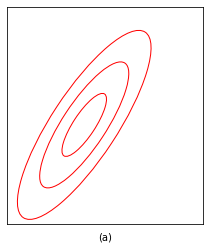

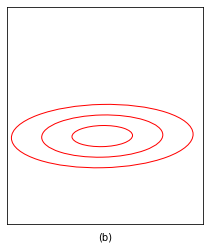

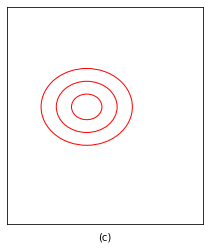

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

x = [5,7,11,15,16,17,18]
y = [8, 5, 8, 9, 17, 18, 25]
x1 = [5,12,14,19,20,23,25]
y1 = [9, 13, 9, 10, 14, 7, 10]
x2 = [9,10,11,13,15,17,18]
y2 = [14, 19, 20, 13, 20, 18, 15]
xs = [x,x1,x2]

# axs = [plt.subplot(131, aspect='equal'), plt.subplot(132, aspect='equal'), plt.subplot(13, aspect='equal')]
ys = [y,y1,y2]
labels = ["(a)","(b)","(c)"]
for i in range(0,3): 
    cov = np.cov(xs[i], ys[i])
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ax = plt.subplot(111, aspect='equal')
    ax.set_xlim(-5,40)
    ax.set_ylim(-10,40)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xlabel(labels[i])
    for j in xrange(1, 4):
        ell = Ellipse(xy=(np.mean(xs[i]), np.mean(ys[i])),
                      width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), color='red')
        ell.set_facecolor('none')
        ax.add_artist(ell)
    # plt.scatter(xs[i], ys[i])  # shows points
    plt.show()

 2\. _[4 pts]_ Reproduce figure 2.8. 
 * Your Gaussian's do not have to be identical, but the covariance matrices should be 
     (a) general [not diagonal or isometric], 
     (b) diagonal, and 
     (c) proportional to the identity matrix. 

3\.  _[4 points]_ Reproduce figure 2.21. 
* The _old faithful_ data is describe in appendix A, you should be able to download it and open it.
* You can (and, for now, you should) use a function from `sklearn` in order to fit a mixture of Gaussians to your data. I beleive you can find what you need [here](http://scikit-learn.org/stable/modules/mixture.html)

**NOTE:** In order to help you out, I will get you started by downloading the data and plotting it

In [6]:
# Download the data
from urllib2 import urlopen
path = 'faithful.txt'
remote = urlopen('https://raw.githubusercontent.com/aidiary/PRML/master/ch9/faithful.txt')
with open('faithful.txt', 'w') as f:
    f.write(remote.read())

In [15]:
# Read it in and inspect it
import pandas
from IPython.display import display
old_faithful = pandas.read_csv(path, sep=' ', names=['duration', 'time-to-next'])
display(old_faithful)

,duration,time-to-next
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
5,2.883,55.0
6,4.700,88.0
7,3.600,85.0
8,1.950,51.0
9,4.350,85.0


In [16]:
# Plot the data --> note that I convert from a DataFrame to an array 
data = old_faithful.as_matrix()
scatter(data[:,0], data[:,1], color='lightgreen')

NameError: name 'scatter' is not defined

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas
from IPython.display import display

data = array(old_faithful)
xs = [data[:,0]]
# axs = [plt.subplot(131, aspect='equal'), plt.subplot(132, aspect='equal'), plt.subplot(13, aspect='equal')]
ys = [data[:,1]]
labels = ["(a)","(b)"]
for i in range(0,1): 
    cov = np.cov(xs[i], ys[i])
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ax = plt.subplot(111, aspect='equal')
    ax.set_xlim(-5,40)
    ax.set_ylim(-10,40)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_xlabel(labels[i])
    for j in xrange(1, 4):
        ell = Ellipse(xy=(np.mean(xs[i]), np.mean(ys[i])),
                      width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), color='red')
        ell.set_facecolor('none')
        ax.add_artist(ell)
    # plt.scatter(xs[i], ys[i])  # shows points
    plt.show()

NameError: name 'array' is not defined